## Python实现基于LDA主题模型进行电商产品评论数据情感分析

## 1. 前言

在21世纪人工智能大数据时代，网上购物已经成为大众生活的重要组成部分。人们在电商平台上浏览商品并购物，产生了海量的用户行为数据，用户对商品的评论数据对商家具有重要的意义。利用好这些碎片化、非结构化的数据，将有利于企业在电商平台上的持续发展，同时，对这部分数据进行分析，依据评论数据来优化现有产品也是大数据在企业经营中的实际应用。

本项目将主要针对用户在**电商平台上留下的评论数据**，对其进行**分词、词性标注**和**去除停用词**等文本预处理。基于预处理后的数据进行情感分析，并使用**LDA主题模型**提取评论关键信息，以了解用户的需求、意见、购买原因及产品的优缺点等，最终提出改善产品的建议，使企业得经营越来越好。

## 2. 项目背景

评论信息中蕴含着消费者对特定产品和服务的主观感受，反映了人们的态度、立场和意见，具有非常宝贵的研究价值。一方面，对企业来说，企业需要根据海量的评论文本数据去更好地了解用户的个人喜好，从而提高产品质量、改善服务，获取市场上的竞争优势。另一方面，消费者需要在没有看到真正的产品实体、做出购买决策之前，根据其他购物者的评论了解产品的质量、性价比等信息，为购物抉择提供参考依据。
请根据提供的数据实现以下目标：


1）对华为手机荣耀50的评论进行情感分析。

2）从评论文本中挖掘用户的需求、意见、购买原因及产品的优缺点。

3）根据模型结果给出改善产品的建议。

## 3. 分析流程

评论数据情感分析流程，主要步骤如下：

1）利用爬虫(爬虫程序可以是自己撰写的Python爬虫或者八爪鱼等爬虫程序)对华为手机荣耀50的评论进行爬取。

2）利用爬取的华为手机荣耀50的评论数据，对评论文本数据进行数据清洗、分词、停用词过滤等操作。

3）对预处理后的数据进行情感分析，将评论文本数据按照情感倾向分为正面评论数据（好评）和负面评论数据（差评）。

4）分别对正、负面评论数据进行LDA主题分析，从对应的结果分析文本评论数据中有价值的内容。 

## 4. 数据预处理

### 4.1 数据去重

电商平台为了避免一些客户长时间不进行评论，往往会设置一道程序，如果用户超过规定的时间仍然没有做出评论，系统就会自动替客户做出评论，这类数据显然没有任何分析价值。

由语言的特点可知，在大多数情况下，不同购买者之间的有价值的评论是不会出现完全重复的，如果不同购物者的评论完全重复，那么这些评论一般都是毫无意义的。显然这种评论中只有最早的评论才有意义（即只有第一条有作用）。

有的部分评论相似程度极高，可是在某些词语的运用上存在差异。此类评论即可归为重复评论，若是删除文字相近评论，则会出现误删的情况。由于相近的评论也存在不少有用的信息，去除这类评论显然不合适。因此，为了存留更多的有用语料，本节针对完全重复的语料下手，仅删除完全重复部分，以确保保留有用的文本评论信息。关键代码如下：

In [ ]:
data = data[['评论内容','评论类型']].drop_duplicates() # 去重

### 4.2类型转换

把评分转换为pos、neg：评分为1 3转换为neg；评分为5转换为pos。关键代码如下：

In [ ]:
data.loc[data['评论类型'] == 1, '评论类型'] = 'neg'
data.loc[data['评论类型'] == 3, '评论类型'] = 'neg'
data.loc[data['评论类型'] == 5, '评论类型'] = 'pos'

### 4.3数据清洗

通过人工观察数据发现，评论中夹杂着许多数字与字母，对于本项目的挖掘目标而言，这类数据本身并没有实质性帮助。

另外，由于该评论文本数据主要是围绕华为手机荣耀50进行评价的，其中“京东”“ 手机”“ 荣耀”“ 华为手机”,”荣耀50”等词出现的频数很大，但是对分析目标并没有什么作用，因此可以在分词之前将这些词去除，对数据进行清洗。

In [ ]:
str_tmp = re.compile('[0-9a-zA-Z]|京东|手机|荣耀|华为手机|荣耀50|') 
# re模块 正则表达式
content = content.apply(lambda x: str_tmp.sub('', str(x))) 
# 空值替换匹配内容

## 5.评论分词

### 5.1分词、词性标注、去除停用词

（1）对评论数据进行分词

分词是文本信息处理的基础环节，是将一个单词序列切分成单个单词的过程。准确地分词可以极大地提高计算机对文本信息的识别和理解能力。相反，不准确的分词将会产生大量的噪声，严重干扰计算机的识别理解能力，并对这些信息的后续处理工作产生较大的影响。

汉语的基本单位是字，由字可以组成词，由词可以组成句子，进而由一些句子组成段、节、章、篇。可见，如果需要处理一篇中文语料，从中正确地识别出词是一件非常基础且重要的工作。

然而，中文以字为基本书写单位，词与词之间没有明显的区分标记。中文分词的任务就是把中文的序列切分成有意义的词，即添加合适的词串使得所形成的词串反映句子的本意，中文分词项目如表所示。

词典匹配是分词最为传统也最为常见的一种办法。匹配方式可以为正向（从左到右）或逆向（从右到左）。对于匹配中遇到的多种分段可能性（Segmentation Ambiguity），通常会选取数目最少的词分隔出来。      很明显，这种方式对词表的依赖很大，一旦出现词表中不存在的新词，算法是无法做到正确切分的。但是词表匹配也有它的优势，比如简单易懂、不依赖训练数据、易于纠错等。

还有一类方法是通过语料数据中的一些统计特征（如互信息量）去估计相邻汉字之间的关联性，进而实现词的切分。这类方法不依赖词表，特别是在对生词的发掘方面具有较强的灵活性，但是也经常会有精度方面的问题。


分词最常用的工作包是jieba分词包，jieba分词是Python写成的一个分词开源库，专门用于中文分词，其有3条基本原理，即实现所采用技术。

          基于Trie树结构实现高效的词图扫描，生成句子中汉字所有可能成词情况所构成的有向无环图（DAG）。jieba分词自带了一个叫作dict.txt的词典，里面有2万多条词，包含了词条出现的次数（这个次数是作者自己基于人民日报语料等资源训练得出来的）和词性。Trie树是有名的前缀树，若一个词语的前面几个字一样，表示该词语具有相同的前缀，可以使用Trie树来存储，Trie树存储方式具有查找速度快的优势。后一句的“生成句子中汉字所有可能成词情况所构成的有向无环图”意思是给定一个待切分的句子，生成一个如图所示的有向无环图。
     
          采用动态规划查找最大概率路径，找出基于词频的最大切分组合。先查找待分词句子中已经切分好的词语，再查找该词语出现的频率，然后根据动态规划查找最大概率路径的方法，对句子从右往左反向计算最大概率（反向是因为汉语句子的重心经常落在右边，从右往左计算，正确率要高于从左往右计算，这个类似于逆向最大匹配），最后得到最大概率的切分组合。“有意见分歧”切分生成的有向无环图
            对于未登录词，采用HMM模型，使用了Viterbi算法，将中文词汇按照BEMS 4个状态来标记。其中B代表begin，表示开始位置；E代表end，表示结束位置；M代表middle，表示中间位置；S代表single，表示单独成词的位置。HMM模型采用(B，E，M，S)这4种状态来标记中文词语，比如北京可以标注为BE，即北/B京/E，表示北是开始位置，京是结束位置，中华民族可以标注为BMME，就是开始、中间、中间和结束。

（2）去除停用词

       停用词（Stop Words），词典译为“电脑检索中的虚字、非检索用字”。在SEO搜索引擎中，为节省存储空间和提高搜索效率，搜索引擎在索引页面或处理搜索请求时会自动忽略某些字或词，这些字或词即被称为停用词。

      停用词一定程度上相当于过滤词（Filter Words），区别是过滤词的范围更大一些，包含色情、政治等敏感信息的关键词都会被视做过滤词加以处理，停用词本身则没有这个限制。通常意义上说，停用词大致可分为以下两类：

       一类是使用十分广泛，甚至过于频繁的一些单词。比如，英文的“i”“is”“what”，中文的“我”“就”等，这些词几乎在每个文档上都会出现，查询这样的词无法保证搜索引擎能够给出真正相关的搜索结果，因此无法通过缩小搜索范围来提高搜索结果的准确性，同时还会降低搜索的效率。因此，在搜索的时候，Google和百度等搜索引擎会忽略特定的常用词，如果使用了太多的停用词，则有可能无法得到精确的结果，甚至可能得到大量毫不相关的搜索结果。

        另一类是文本中出现频率很高，但实际意义不大的词。这一类词主要包括了语气助词、副词、介词、连词等，它们自身通常并无明确意义，只有将其放入一个完整的句子中才有一定作用。常见的有“的”“在”“和”“接着”等，例如“我是你最好的朋友”，这句话中的“是”“的”就是两个停用词。

      经过分词后，评论由一个字符串的形式变为多个由文字或词语组成的字符串的形式，可判断评论中词语是否为停用词。根据上述停用词的定义整理出停用词库，并根据停用词库去除评论中的停用词，关键代码如下：


In [ ]:
word_tmp = lambda s: [(x.word, x.flag) for x in psg.cut(s)]  # 自定义简单分词函数
seg_word = content.apply(word_tmp)
 
 
content_type = [[x] * y for x, y in zip(list(data['评论类型']), list(n_word))]
content_type = sum(content_type, [])  # 评论类型
 
 
n_word = list(result.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
index_word = sum(index_word, [])  # 表示词语在该评论的位置

### 5.2 提取含名词的评论

由于本项目的目标是对产品特征的优缺点进行分析，类似“不错，很好的产品”“很不错，继续支持”等评论虽然表达了对产品的情感倾向，但是实际上无法根据这些评论提取出哪些产品特征是用户满意的。评论中只有出现明确的名词，如机构团体及其他专有名词时，才有意义，因此需要对分词后的词语进行词性标注。之后再根据词性将含有名词类的评论提取出来。jieba关于词典词性标记，采用ICTCLAS的标记方法。ICTCLAS汉语词性标注集如表所示。

根据得出的词性，提取评论中词性含有“n”的评论，关键代码如下：

In [ ]:
ind = result[['n' in x for x in result['nature']]]['index_content'].unique()
result = result[[x in ind for x in result['index_content']]]

## 5.3绘制词云查看分词效果

进行数据预处理后，可绘制词云查看分词效果，词云会将文本中出现频率较高的“关键词”予以视觉上的突出。首先需要对词语进行词频统计，将词频按照降序排序，选择前100个词，使用wordcloud模块中的WordCloud绘制词云，查看分词效果，代码如下

In [ ]:
frequencies = result.groupby(by=['word'])['word'].count()
frequencies = frequencies.sort_values(ascending=False)
backgroud_Image = plt.imread('./data/pl.jpg')
wordcloud = WordCloud(font_path="simsun.ttf",
                          max_words=100,
                          background_color='white',
                          mask=backgroud_Image)
my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)

## 6. 情感分析与建立模型

### 6.1  评论数据情感倾向分析

#### 6.1.1 匹配情感词

情感倾向也叫做情感极性。在某商品评论中，可以理解为用户对该商品表达自身观点所持的态度是支持、反对还是中立，即通常所指的正面情感、负面情感、中性情感。由于本项目主要是对产品的优缺点进行分析，因此只要确定用户评论信息中的情感倾向方向分析即可，不需要分析每一评论的情感程度。

对评论情感倾向进行分析首先要对情感词进行匹配，主要采用词典匹配的方法，本项目使用的情感词表是知网发布的“情感分析用词语集（beta版）”，主要使用“中文正面评价”词表、“中文负面评价”“中文正面情感”“中文负面情感”词表等。将“中文正面评价”“中文正面情感”两个词表合并，并给每个词语赋予初始权重1，作为本项目的正面评论情感词表。将“中文负面评价”“中文负面情感”两个词表合并，并给每个词语赋予初始权重-1，作为本项目的负面评论情感词表。

一般基于词表的情感分析方法，分析的效果往往与情感词表内的词语有较强的相关性，如果情感词表内的词语足够全面，并且词语符合该项目场景下所表达的情感，那么情感分析的效果会更好。针对本项目场景，需要在知网提供的词表基础上进行优化，例如“好评”“超值”“差评”“五分”等词只有在网络购物评论上出现，就可以根据词语的情感倾向添加至对应的情感词表内。将“满意”“好评”“很快”“还好”“还行”“超值”“给力”“支持”“超好”“感谢”“太棒了”“厉害”“挺舒服”“辛苦”“完美”“喜欢”“值得”“省心”等词添加进正面情感词表。将“差评”“贵”“高”“漏水”等词加入负面情感词表。

读入正负面评论情感词表，正面词语赋予初始权重1，负面词语赋予初始权重-1。使用merge函数按照词语情感词表与分词结果进行匹配，代码如下：


In [ ]:
 positive = set(pos_comment.iloc[:, 0]) | set(pos_emotion.iloc[:, 0])
    negative = set(neg_comment.iloc[:, 0]) | set(neg_emotion.iloc[:, 0])
    intersection = positive & negative  # 正负面情感词表中相同的词语
    positive = list(positive - intersection)
    negative = list(negative - intersection)
    positive = pd.DataFrame({"word": positive,
                             "weight": [1] * len(positive)})
    negative = pd.DataFrame({"word": negative,
                             "weight": [-1] * len(negative)})

#### 6.1.2 修正情感倾向

情感倾向修正主要根据情感词前面两个位置的词语是否存在否定词而去判断情感值的正确与否，由于汉语中存在多重否定现象，即当否定词出现奇数次时，表示否定意思；当否定词出现偶数次时，表示肯定意思。按照汉语习惯，搜索每个情感词前两个词语，若出现奇数否定词，则调整为相反的情感极性。

本项目使用的否定词表共有19个否定词，分别为：不、没、无、非、莫、弗、毋、未、否、别、無、休、不是、不能、不可、没有、不用、不要、从没、不太。

读入否定词表，对情感值的方向进行修正。计算每条评论的情感得分，将评论分为正面评论和负面评论，并计算情感分析的准确率，关键代码如下：

In [ ]:
for i in np.arange(0, len(only_inclination)):
        review = data_posneg[data_posneg['index_content'] ==
                             only_inclination['index_content'][i]]  # 提取第i个情感词所在的评论
        review.index = np.arange(0, len(review))
        affective = only_inclination['index_word'][i]  # 第i个情感值在该文档的位置
        if affective == 1:
            ne = sum([i in notdict['term'] for i in review['word'][affective - 1]])
            if ne == 1:
                data_posneg['amend_weight'][index[i]] = - \
                    data_posneg['weight'][index[i]]
        elif affective > 1:
            ne = sum([i in notdict['term'] for i in review['word'][[affective - 1,
                                                                    affective - 2]]])
            if ne == 1:
                data_posneg['amend_weight'][index[i]] = - \
                    data_posneg['weight'][index[i]]

#### 6.1.3 查看情感效果

使用wordcloud包下的WordCloud函数分别对正面评论和负面评论绘制词云，以查看情感分析效果，关键代码如下：

In [ ]:
 result = emotional_value.merge(word,
                                   left_on='index_content',
                                   right_on='index_content',
                                   how='left')

    result = result[['index_content', 'content_type', 'a_type']].drop_duplicates()
    confusion_matrix = pd.crosstab(result['content_type'], result['a_type'],
                                   margins=True)  # 制作交叉表
    print((confusion_matrix.iat[0, 0] + confusion_matrix.iat[1, 1]) / confusion_matrix.iat[2, 2])
    print(confusion_matrix)
    # 提取正负面评论信息
    ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
    ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
    posdata = word[[i in ind_pos for i in word['index_content']]]
    negdata = word[[i in ind_neg for i in word['index_content']]]

In [ ]:
 # 正面情感词词云
    freq_pos = posdata.groupby(by=['word'])['word'].count()
    freq_pos = freq_pos.sort_values(ascending=False)

In [ ]:
# 负面情感词词云
freq_neg = negdata.groupby(by=['word'])['word'].count()
    freq_neg = freq_neg.sort_values(ascending=False)

正面情感评论词云可知，“不错”“速度”“喜欢”等正面情感词出现的频数较高，并且没有掺杂负面情感词语，可以看出情感分析能较好地将正面情感评论抽取出来。

由负面情感评论词云可知，“卡” “不好”等负面情感词出现的频数较高，可以看出情感分析能较好地将负面情感评论抽取出来。

为了进一步查看情感分析效果，假定用户在评论时不存在“选了好评的标签，而写了差评内容”的情况，比较原评论的评论类型与情感分析得出的评论类型，绘制情感倾向分析混淆矩阵

### 6.2 LDA模型进行主题分析

### 6.2.1 LDA主题模型概念介绍

主题模型在自然语言处理等领域是用来在一系列文档中发现抽象主题的一种统计模型。判断两个文档相似性的传统方法是通过查看两个文档共同出现的单词的多少，如TF（词频）、TF-IDF（词频—逆向文档频率）等，这种方法没有考虑文字背后的语义关联，例如，两个文档共同出现的单词很少甚至没有，但两个文档是相似的，因此在判断文档相似性时，需要使用主题模型进行语义分析并判断文档相似性。

如果一篇文档有多个主题，则一些特定的可代表不同主题的词语就会反复出现，此时，运用主题模型，能够发现文本中使用词语的规律，并且把规律相似的文本联系到一起，以寻求非结构化的文本集中的有用信息。例如，在华为手机荣耀50的商品评论文本数据中，代表电华为手机荣耀50特征的词语如“速度”“外观”“拍照”等会频繁地出现在评论中，运用主题模型，把华为手机荣耀50代表性特征相关的情感描述性词语与对应特征的词语联系起来，从而深入了解用户对电华为手机荣耀50的关注点及用户对于某一特征的情感倾向。

潜在狄利克雷分配，即LDA模型（Latent Dirichlet Allocation，LDA）是由Blei等人在2003年提出的生成式主题模型。LDA是一种**无监督机器学习技术**，可以用来识别大规模文档集或语料库中的潜在隐藏的主题信息。该方法假设每个词背后都有一个潜在隐藏的主题。而我们则利用这种方法将文本语料进行特征提取，把具有潜在主题信息的词语抽取出来，通过对特征词的各个维度进行计算比较，筛选出符合标准的单词构建特征词库。生成模型，即认为每一篇文档的每一个词都是通过“一定的概率选择了某个主题，并从这个主题中以一定的概率选择了某个词语”。LDA模型也被称为**3层贝叶斯概率模型**，包含文档（d）、主题（z）、词（w）3层结构，能够有效对文本进行建模，和传统的空间向量模型（VSM）相比，增加了概率的信息。通过LDA主题模型，能够挖掘数据集中的潜在主题，进而分析数据集的集中关注点及其相关特征词。

LDA模型采用词袋模型（Bag of Words，BOW）将每一篇文档视为一个词频向量，从而将文本信息转化为易于建模的数字信息。

定义词表大小为L，一个L维的向量（1，0，0，...，0，0）表示一个词。由N个词构成的评论记为$d = (w_1,w_2,...,w_n)$,设某一商品的评论集D由M篇评论构成，记为$ D = (d_1,d_2,...,d_m)。M篇评论分布着K个主题，记为$ Z_{i = (i=1,...,K)}$。记$\alpha$和$ \beta $为狄利克雷函数的先验参数，$\theta$为主题在文档中的多项分布的参数，其服从超参数为$\alpha$的dirichlet先验分布，$ \Phi$为词在主题中的多项分布的参数，其服从超参数$ \beta $的Dirichlet先验分布。LDA模型图如图所示:
![本地路径](.\\img\\LDA模型结构示意图.png "相对路径演示,下一级目录")

LDA模型假定每篇评论由各个主题按一定比例随机混合而成，混合比例服从多项分布，记为式:
$$
Z|\theta = Multinomial(\theta)
$$

而每个主题由词汇表中的各个词语按一定比例混合而成，混合比例也服从多项分布，记为式:
$$
W|Z,\Phi = Multinomial(\Phi)
$$
在评论$d_j$条件下，生成词$w_i$的概率表示为式：
$$
P(w_i|d|j) = \sum^K_{s=1} P(w_i|z =s) * P(z=s|d_j)
$$
其中，$P(w_i|z=s)$表示词$w_i$ 属于第s个主题的概率，$P(z=s|d_j)$表示第s个主题在评论$d_j$中的概率。

LDA主题模型是一种无监督的模式，只需要提供训练文档，就可以自动训练出各种概率，无须任何人工标注过程，节省了大量的人力及时间。它在文本聚类、主题分析、相似度计算等方面都有广泛的应用。相对于其他主题模型，其引入了狄利克雷先验知识。因此，模型的泛化能力较强，不易出现过拟合现象。

LDA主题模型可以解决多种指代问题，例如，在对华为手机荣耀50的评论中，根据分词的一般规则，经过分词的语句会将“质量”一词单独分割出来，而“质量”是指送货质量还是华为手机荣耀50质量等其他情况？如果只是简单地进行词频统计及情感分析，是无法识别的。这种指代不明的问题并不能准确地反应用户情况，运用LDA主题模型则可以求得词汇在主题中的概率分布，进而判断“质量”一词属于哪个主题，并求得属于这一主题的概率和同一主题下的其他特征词，从而解决多种指代问题。建立LDA主题模型，首先需要建立词典及语料库，关键代码如下：

In [ ]:
  # 建立词典
    pos_dict = corpora.Dictionary([[i] for i in posdata['word']])  # 正面
    neg_dict = corpora.Dictionary([[i] for i in negdata['word']])  # 负面


In [ ]:
 # 建立语料库
    pos_corpus = [pos_dict.doc2bow(j) for j in [[i] for i in posdata['word']]]  # 正面
    neg_corpus = [neg_dict.doc2bow(j) for j in [[i] for i in negdata['word']]]  # 负面

#### 6.2.2 寻找最优主题数


基于相似度的自适应最优LDA模型选择方法，确定主题数并进行主题分析。实验证明该方法可以在不需要人工调试主题数目的情况下，用相对少的迭代找到最优的主题结构。具体步骤如下：

1）取初始主题数k值，得到初始模型，计算各主题之间的相似度（平均余弦距离）。

2）增加或减少k值，重新训练模型，再次计算各主题之间的相似度。

3）重复步骤2直到得到最优k值。

利用各主题间的余弦相似度来度量主题间的相似程度。从词频入手，计算它们的相似度，用词越相似，则内容越相近。

假定A和B是两个n维向量，A是$(A_1,A_2,...,A_n)$，B是$ ( B_1,B_2,...,B_n) $，则A与B的夹角的余弦值通过式计算。
$$
\cos \theta=\sum_{i=1}^n A_i B_i / \sum_{i=1}^n A_i{ }^2 \sum_{i=1}^n B_i{ }^2=A B /|A B|
$$

使用LDA主题模型，找出不同主题数下的主题词，每个模型各取出若干个主题词（比如前100个），合并成一个集合。生成任何两个主题间的词频向量，计算两个向量的余弦相似度，值越大就表示越相似；计算各个主题数的平均余弦相似度，寻找最优主题数，关键代码如下：



In [ ]:
   # 构造主题数寻优函数
    def cos(vector1, vector2):  # 余弦相似度函数
        dot_product = 0.0
        normA = 0.0
        normB = 0.0
        for a, b in zip(vector1, vector2):
            dot_product += a * b
            normA += a ** 2
            normB += b ** 2
        if normA == 0.0 or normB == 0.0:
            return (None)
        else:
            return (dot_product / ((normA * normB) ** 0.5))

In [ ]:
  # 循环生成主题并计算主题间相似度
        for i in np.arange(2, 11):
            lda = models.LdaModel(x_corpus, num_topics=i, id2word=x_dict)  # LDA模型训练
            for j in np.arange(i):
                term = lda.show_topics(num_words=50)

In [ ]:
 fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(211)
    ax1.plot(pos_k)
    ax1.set_xlabel('正面评论LDA主题数寻优', fontproperties=font)

    ax2 = fig.add_subplot(212)
    ax2.plot(neg_k)
    ax2.set_xlabel('负面评论LDA主题数寻优', fontproperties=font)
    plt.show()

对于正面评论数据，当主题数为2或3时，主题间的平均余弦相似度就达到了最低。因此，对正面评论数据做LDA，可以选择主题数为3；对于负面评论数据，当主题数为3时，主题间的平均余弦相似度也达到了最低。因此，对负面评论数据做LDA，也可以选择主题数为3。

#### 6.2.3 评价主题分析结果
根据主题数寻优结果，使用Python的Gensim模块对正面评论数据和负面评论数据分别构建LDA主题模型，设置主题数为3，经过LDA主题分析后，每个主题下生成10个最有可能出现的词语以及相应的概率，关键代码如下：

In [ ]:
    # LDA主题分析
    pos_lda = models.LdaModel(pos_corpus, num_topics=3, id2word=pos_dict)
    neg_lda = models.LdaModel(neg_corpus, num_topics=3, id2word=neg_dict)
    print(pos_lda.print_topics(num_words=10))

    print(neg_lda.print_topics(num_words=10))

## 完整代码运行

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import jieba.posseg as psg
import itertools

In [24]:
def Data_Ychuli():
    data = pd.read_excel("电商商品华为手机评论.xlsx")
    data = data[['评论内容','评论类型']].drop_duplicates() #去重
    data.to_excel('data_tmp.xlsx')
    content = data['评论内容']
    # 数据转换
    data.loc[data['评论类型'] == 1, '评论类型'] = 'neg' # 选取data中‘评论类型’列值为1的所有行，把行值改为neg
    data.loc[data['评论类型'] == 3, '评论类型'] = 'neg'
    data.loc[data['评论类型'] == 5, '评论类型'] = 'pos'
    print("输出data.head:","/n",data.head())

    # 数据清洗
    # 去除去除英文、数字等
    # 由于评论主要为商品的评论，因此去除这些词语
    str_tmp = re.compile('[0-9a-zA-Z]|京东|手机|荣耀|华为手机|荣耀50|')  # re模块 正则表达式
    content = content.apply(
        lambda x: str_tmp.sub('', str(x))
        )  # 空值替换匹配内容

    # 分词、词性标注、去除停用词代码
    # 分词
    word_tmp = lambda s: [(x.word, x.flag) for x in psg.cut(s)]  # 自定义简单分词函数
    seg_word = content.apply(word_tmp)
    # 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
    n_word = seg_word.apply(
        lambda x: len(x)
        )  # 每一评论中词的个数
    
    n_content = [[x + 1] * y for x, y in zip(list(seg_word.index), list(n_word))]
    index_content = sum(n_content, [])  # 将嵌套的列表展开，作为词所在评论的id

    seg_word = sum(seg_word, [])
    word = [x[0] for x in seg_word]  # 词

    nature = [x[1] for x in seg_word]  # 词性

    content_type = [[x] * y for x, y in zip(list(data['评论类型']), list(n_word))]
    content_type = sum(content_type, [])  # 评论类型

    result = pd.DataFrame({"index_content": index_content,
                           "word": word,
                           "nature": nature,
                           "content_type": content_type})
    # 删除标点符号
    result = result[result['nature'] != 'x']  # x表示标点符号

    # 删除停用词
    stop_path = open("./data/stoplist.txt", 'r', encoding='UTF-8')
    stop = stop_path.readlines()
    stop = [x.replace('\n', '') for x in stop]
    word = list(set(word) - set(stop))
    result = result[result['word'].isin(word)]

    # 构造各词在对应评论的位置列
    n_word = list(result.groupby(by=['index_content'])['index_content'].count())
    index_word = [list(np.arange(0, y)) for y in n_word]
    index_word = sum(index_word, [])  # 表示词语在该评论的位置

    # 合并评论id，评论中词的id，词，词性，评论类型
    result['index_word'] = index_word

    # 提取含有名词类的评论
    ind = result[['n' in x for x in result['nature']]]['index_content'].unique()
    result = result[[x in ind for x in result['index_content']]]


    # 绘制词云
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    frequencies = result.groupby(by=['word'])['word'].count()
    frequencies = frequencies.sort_values(ascending=False)
    backgroud_Image = plt.imread('./data/pl.jpg')
    wordcloud = WordCloud(font_path="simsun.ttf",
                          max_words=100,
                          background_color='white',
                          mask=backgroud_Image)
    my_wordcloud = wordcloud.fit_words(frequencies)
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.show()

    # 将结果写出
    result.to_excel("./tmp/word_shouji.xlsx", index=False)



In [29]:
def Qinggan_Analysis():
    word = pd.read_excel("./tmp/word_shouji.xlsx")

    # 读入正面、负面情感评价词
    pos_comment = pd.read_csv("./data/正面评价词语（中文）.txt", header=None, sep="/n",
                              encoding='utf-8', engine='python')
    neg_comment = pd.read_csv("./data/负面评价词语（中文）.txt", header=None, sep="/n",
                              encoding='utf-8', engine='python')
    pos_emotion = pd.read_csv("./data/正面情感词语（中文）.txt", header=None, sep="/n",
                              encoding='utf-8', engine='python')
    neg_emotion = pd.read_csv("./data/负面情感词语（中文）.txt", header=None, sep="/n",
                              encoding='utf-8', engine='python')

    # 合并情感词与评价词
    positive = set(pos_comment.iloc[:, 0]) | set(pos_emotion.iloc[:, 0])
    negative = set(neg_comment.iloc[:, 0]) | set(neg_emotion.iloc[:, 0])
    intersection = positive & negative  # 正负面情感词表中相同的词语
    positive = list(positive - intersection)
    negative = list(negative - intersection)
    positive = pd.DataFrame({"word": positive,
                             "weight": [1] * len(positive)})
    negative = pd.DataFrame({"word": negative,
                             "weight": [-1] * len(negative)})

    posneg = positive._append(negative)

    #  将分词结果与正负面情感词表合并，定位情感词
    data_posneg = posneg.merge(word, left_on='word', right_on='word',
                               how='right')
    data_posneg = data_posneg.sort_values(by=['index_content', 'index_word'])

    # 修正情感倾向

    # 根据情感词前时候有否定词或双层否定词对情感值进行修正
    # 载入否定词表
    notdict = pd.read_csv("./data/not.csv")

    # 处理否定修饰词
    data_posneg['amend_weight'] = data_posneg['weight']  # 构造新列，作为经过否定词修正后的情感值
    data_posneg['id'] = np.arange(0, len(data_posneg))
    only_inclination = data_posneg.dropna()  # 只保留有情感值的词语
    only_inclination.index = np.arange(0, len(only_inclination))
    index = only_inclination['id']

    for i in np.arange(0, len(only_inclination)):
        review = data_posneg[data_posneg['index_content'] ==
                             only_inclination['index_content'][i]]  # 提取第i个情感词所在的评论
        review.index = np.arange(0, len(review))
        affective = only_inclination['index_word'][i]  # 第i个情感值在该文档的位置
        if affective == 1:
            ne = sum([i in notdict['term'] for i in review['word'][affective - 1]])
            if ne == 1:
                data_posneg['amend_weight'][index[i]] = - \
                    data_posneg['weight'][index[i]]
        elif affective > 1:
            ne = sum([i in notdict['term'] for i in review['word'][[affective - 1,
                                                                    affective - 2]]])
            if ne == 1:
                data_posneg['amend_weight'][index[i]] = - \
                    data_posneg['weight'][index[i]]

    # 更新只保留情感值的数据
    only_inclination = only_inclination.dropna()

    # 计算每条评论的情感值
    emotional_value = only_inclination.groupby(['index_content'],
                                               as_index=False)['amend_weight'].sum()

    # 去除情感值为0的评论
    emotional_value = emotional_value[emotional_value['amend_weight'] != 0]

    # 查看情感分析效果

    # 给情感值大于0的赋予评论类型（content_type）为pos,小于0的为neg
    emotional_value['a_type'] = ''
    emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
    emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'

    # 查看情感分析结果
    result = emotional_value.merge(word,
                                   left_on='index_content',
                                   right_on='index_content',
                                   how='left')

    result = result[['index_content', 'content_type', 'a_type']].drop_duplicates()
    confusion_matrix = pd.crosstab(result['content_type'], result['a_type'],
                                   margins=True)  # 制作交叉表
    print((confusion_matrix.iat[0, 0] + confusion_matrix.iat[1, 1]) / confusion_matrix.iat[2, 2])
    print(confusion_matrix)
    # 提取正负面评论信息
    ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
    ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
    posdata = word[[i in ind_pos for i in word['index_content']]]
    negdata = word[[i in ind_neg for i in word['index_content']]]

    # 绘制词云
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    # 正面情感词词云
    freq_pos = posdata.groupby(by=['word'])['word'].count()
    freq_pos = freq_pos.sort_values(ascending=False)
    backgroud_Image = plt.imread('./data/pl.jpg')
    wordcloud = WordCloud(font_path="simsun.ttf",
                          max_words=100,
                          background_color='white',
                          mask=backgroud_Image)
    pos_wordcloud = wordcloud.fit_words(freq_pos)
    plt.imshow(pos_wordcloud)
    plt.axis('off')
    plt.show()
    # 负面情感词词云
    freq_neg = negdata.groupby(by=['word'])['word'].count()
    freq_neg = freq_neg.sort_values(ascending=False)
    neg_wordcloud = wordcloud.fit_words(freq_neg)
    plt.imshow(neg_wordcloud)
    plt.axis('off')
    plt.show()

    # 将结果写出,每条评论作为一行
    posdata.to_excel("./tmp/posdata_shouji.xlsx", index=False)
    negdata.to_excel("./tmp/negdata_shouji.xlsx", index=False)

In [36]:
def Lda_Model():
    # 载入情感分析后的数据
    posdata = pd.read_excel("./tmp/posdata_shouji.xlsx")
    negdata = pd.read_excel("./tmp/negdata_shouji.xlsx")

    from gensim import corpora, models
    # 建立词典
    pos_dict = corpora.Dictionary([[i] for i in posdata['word']])  # 正面
    neg_dict = corpora.Dictionary([[i] for i in negdata['word']])  # 负面

    # 建立语料库
    pos_corpus = [pos_dict.doc2bow(j) for j in [[i] for i in posdata['word']]]  # 正面
    neg_corpus = [neg_dict.doc2bow(j) for j in [[i] for i in negdata['word']]]  # 负面

    # 主题数寻优

    # 构造主题数寻优函数
    def cos(vector1, vector2):  # 余弦相似度函数
        dot_product = 0.0
        normA = 0.0
        normB = 0.0
        for a, b in zip(vector1, vector2):
            dot_product += a * b
            normA += a ** 2
            normB += b ** 2
        if normA == 0.0 or normB == 0.0:
            return (None)
        else:
            return (dot_product / ((normA * normB) ** 0.5))

            # 主题数寻优

    def lda_k(x_corpus, x_dict):

        # 初始化平均余弦相似度
        mean_similarity = []
        mean_similarity.append(1)

        # 循环生成主题并计算主题间相似度
        for i in np.arange(2, 11):
            lda = models.LdaModel(x_corpus, num_topics=i, id2word=x_dict)  # LDA模型训练
            for j in np.arange(i):
                term = lda.show_topics(num_words=50)

            # 提取各主题词
            top_word = []
            for k in np.arange(i):
                top_word.append([''.join(re.findall('"(.*)"', i)) \
                                 for i in term[k][1].split('+')])  # 列出所有词

            # 构造词频向量
            word = sum(top_word, [])  # 列出所有的词
            unique_word = set(word)  # 去除重复的词

            # 构造主题词列表，行表示主题号，列表示各主题词
            mat = []
            for j in np.arange(i):
                top_w = top_word[j]
                mat.append(tuple([top_w.count(k) for k in unique_word]))

            p = list(itertools.permutations(list(np.arange(i)), 2))
            l = len(p)
            top_similarity = [0]
            for w in np.arange(l):
                vector1 = mat[p[w][0]]
                vector2 = mat[p[w][1]]
                top_similarity.append(cos(vector1, vector2))

            # 计算平均余弦相似度
            mean_similarity.append(sum(top_similarity) / l)
        return (mean_similarity)

    # 计算主题平均余弦相似度
    pos_k = lda_k(pos_corpus, pos_dict)
    neg_k = lda_k(neg_corpus, neg_dict)

    # 绘制主题平均余弦相似度图形
    from matplotlib.font_manager import FontProperties
    font = FontProperties(size=14)
    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(211)
    ax1.plot(pos_k)
    ax1.set_xlabel('正面评论LDA主题数寻优', fontproperties=font)

    ax2 = fig.add_subplot(212)
    ax2.plot(neg_k)
    ax2.set_xlabel('负面评论LDA主题数寻优', fontproperties=font)
    plt.show()

    # LDA主题分析
    pos_lda = models.LdaModel(pos_corpus, num_topics=3, id2word=pos_dict)
    neg_lda = models.LdaModel(neg_corpus, num_topics=3, id2word=neg_dict)
    print(pos_lda.print_topics(num_words=10))

    print(neg_lda.print_topics(num_words=10))

输出data.head: /n                                                 评论内容 评论类型
0  外形外观：非常好看，老婆非常喜欢\n屏幕音效：效果好\n拍照效果：绝对高清，效果很好\n运行...  pos
1  外形外观：外形外观：包装非常完好，信任京东！非常靓丽的外形。握在手里很舒适。\n拍照效果：拍...  pos
2  外形外观：这个整体外观还是不错的，比较新颖，而且很时尚。\n运行速度：速度方面现在还是很流畅...  pos
3  外形外观：非常炸眼的配色，选就选这个颜色，亮晶晶，出众！\n拍照效果：拍照效果很好，主打，摄...  pos
4  手机终于到了 一大早就给送来了 给媳妇买的 手机非常漂亮 曲屏很有质感 媳妇很喜欢 用了一会...  pos


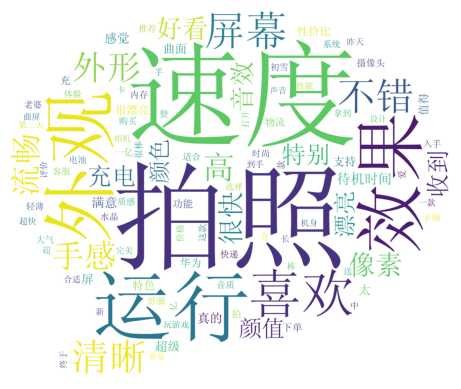

In [37]:
Data_Ychuli()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_44832\3543720375.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_44832\3543720375.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'


0.9750996015936255
a_type        neg  pos   All
content_type                
neg            21   18    39
pos             7  958   965
All            28  976  1004


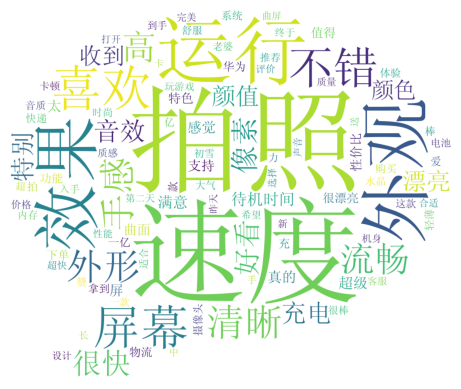

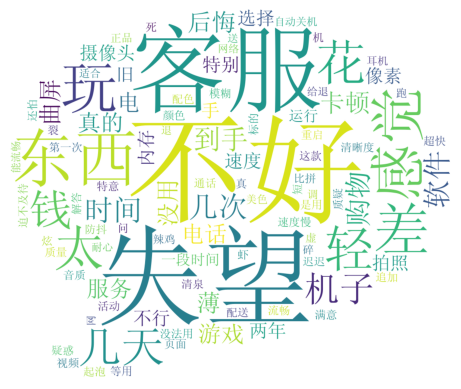

In [38]:
Qinggan_Analysis()

In [39]:
Lda_Model()

AttributeError: 'list' object has no attribute '_append'